<a href="https://colab.research.google.com/github/limjunghyeon/ESAA_py/blob/main/ESAA_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 라이브러리 및 데이터**


In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,100 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128285 files and di

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [126]:
# 데이터 불러오기
train=pd.read_csv("/content/movies_train.csv")
test=pd.read_csv("/content/movies_test.csv")
submission=pd.read_csv("/content/submission.csv")

# **2. 탐색적 자료분석(EDA)**



*9.dir_prev_num, 관객수, 감독( dir_prev_num, box_off_num, director)의 상관관계*

**:제작에 참여한 영화개수가 많은 감독일수록 평균 영화 관객 수가 많을 것이다.**



-dir_prev_num (train 변수): 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)

-box_off_num (train 변수) : 관객수

-director(train 변수) : 감독이름

In [145]:
# 감독으로 그룹화 -이 영화 만들기 전 제작에 참여한 영화의 개수 순으로 나열

train['box_off_num(단위:백만)']=train.box_off_num/1000000

train1=train[['director','dir_prev_num','box_off_num(단위:백만)']].groupby('director').mean().sort_values('dir_prev_num',ascending=False)

train1=train1[0:20]

train1

,dir_prev_num,box_off_num(단위:백만)
director,,
이해준,5.0,0.386074
김진영,5.0,0.472695
홍원찬,4.0,0.441208
이해영,4.0,0.276716
김휘,4.0,1.277621
정세교,4.0,0.008897
장철수,4.0,6.959083
김봉주,4.0,1.596762
국동석,4.0,1.766285


<Axes: xlabel='director'>

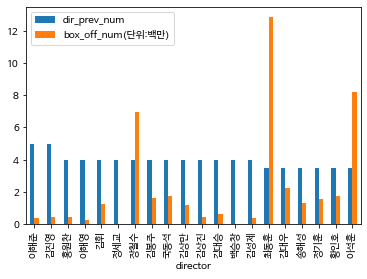

In [146]:
# plot
train1.plot(kind='bar')

**결론: 영화 참여 작품 개수와 평균 영화 관람객은 상관이 없는 것으로 보임.**

*10. 장르, 영화제목길이(genre, title)의 상관관계*


title : 영화의 제목

genre : 장르



In [156]:
train=pd.read_csv("/content/movies_train.csv")


In [157]:
#step1. 영화 제목 길이를 나타내는 행(lentitle) 추가
train['lentitle']= 3

for i in range(600):
  train.lentitle[i]=len(train.title[i])
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,lentitle
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,6
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,4
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,9
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,8
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091,2
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438,4
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475,5
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525,6


<Axes: xlabel='genre'>

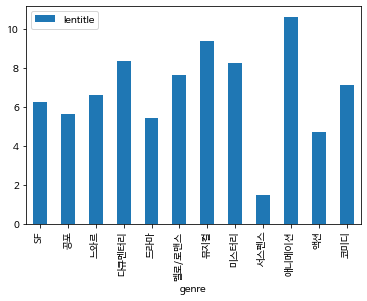

In [158]:
#step2. 장르로 그룹화해서 plot 그리기기

train[['genre','lentitle']].groupby('genre').mean().plot(kind='bar')